In [14]:
#Import Dependencies

import pandas as pd
import numpy as np
import os

In [15]:
#Load CNN Output Predictions
logits = pd.read_csv('./CNN/logits/logits_20231222_16:36:37.csv')
logits.drop(labels=['Unnamed: 0'],inplace=True, axis=1)
logits.rename(columns={'0':'logits'}, inplace=True)

In [16]:
test_data = pd.read_csv('load_data/Target-test.csv')
full_df = test_data.merge(logits, how='left', left_index=True, right_index=True)
full_df = full_df.drop(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1'], axis=1)

In [43]:
full_df = full_df[full_df.Return < 100]

In [44]:
full_df['decile'] = pd.qcut(full_df['logits'], q=10, labels=False)

# #Create decile plot to visualize results
# decile_plot = full_df.groupby(by='decile').mean()

/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_17865/1244122040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['decile'] = pd.qcut(full_df['logits'], q=10, labels=False)


In [47]:
decile_plot = full_df[['Return', 'logits', 'decile']].groupby('decile').mean()

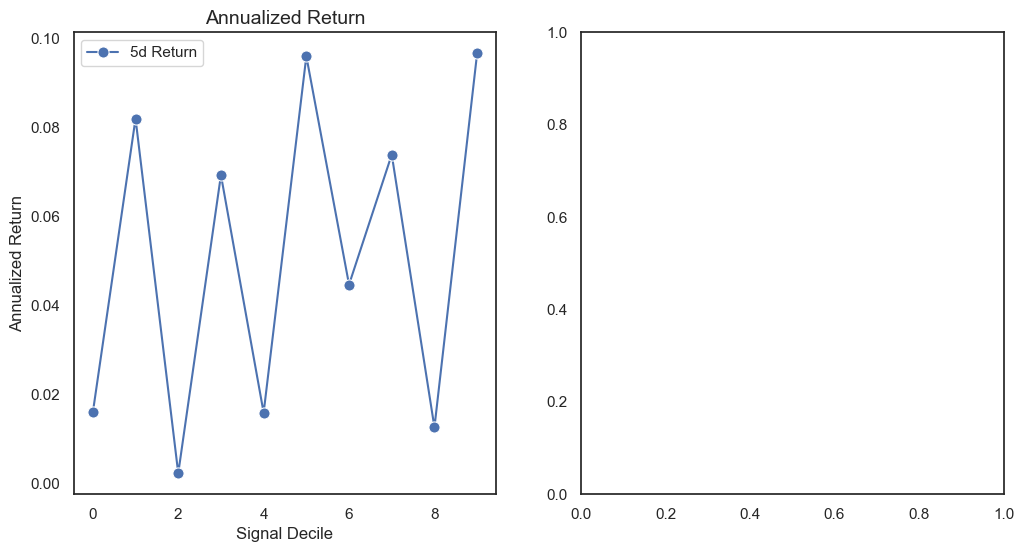

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming decile_plot has a column 'Ret_5d_annualized' and 'volatility'
# Replace 'your_dataframe' with the actual name of your DataFrame
sns.set(style="white")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for Annualized Return
sns.lineplot(x=decile_plot.index, y=decile_plot['Return'], label='5d Return', marker='o', markersize=8, ax=axes[0])
axes[0].set_xlabel('Signal Decile', fontsize=12)
axes[0].set_ylabel('Annualized Return', fontsize=12)
axes[0].set_title('Annualized Return', fontsize=14)
axes[0].legend()